In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.utils import resample
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid',context='notebook',font_scale=1.2)

# Reading Data

In [3]:
column_descriptions = pd.read_csv("public_layout.csv")
data = pd.read_csv("recs2009_public.csv")


/var/folders/l2/k6835zqd6430gf93n9qspq0h0000gn/T/ipykernel_1926/3682833179.py:2: DtypeWarning: Columns (717,718) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("recs2009_public.csv")


In [4]:
column_descriptions.columns

Index(['Variable Name', 'Variable Label', 'Variable Order in File',
       'Variable Type', 'Length'],
      dtype='object')

In [5]:
column_descriptions.head()

,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
0,DOEID,Unique identifier for each respondent,1,Character,5
1,REGIONC,Census Region,2,Numeric,8
2,DIVISION,Census Division,3,Numeric,8
3,REPORTABLE_DOMAIN,Reportable states and groups of states,4,Numeric,8
4,TYPEHUQ,Type of housing unit,5,Numeric,8


In [6]:
data.shape

(12083, 940)

In [7]:
data.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


##### - missing value check

In [8]:

missing_value_data = (data.isna().sum()/data.shape[0]).to_frame().reset_index().rename(columns={'index':'column'})
missing_value_data

,column,0
0,DOEID,0.0
1,REGIONC,0.0
2,DIVISION,0.0
3,REPORTABLE_DOMAIN,0.0
4,TYPEHUQ,0.0
...,...,...
935,WSF,0.0
936,OA_LAT,0.0
937,GWT,0.0
938,DesignDBT99,0.0


In [9]:
# there are no missing values in the dataset
missing_value_data[missing_value_data[0] > 0 ]

,column,0


* there are 940 columns in total, which mean its a high dimensional data (having high dimensions is a problem which is known as curse of dimensionality)
* 

In [10]:
#search column name using keywords from the column description
column_descriptions[['Variable Name','Variable Label']][column_descriptions['Variable Label'].str.lower().str.contains('housing')]

,Variable Name,Variable Label
4,TYPEHUQ,Type of housing unit
12,METROMICRO,Housing unit in Census Metropolitan Statistica...
13,UR,Housing unit classified as urban or rural by C...
14,KOWNRENT,"Housing unit is owned, rented, or occupied wit..."
15,CONDCOOP,Housing unit part of condominium or cooperative
16,YEARMADE,Year housing unit was built
17,YEARMADERANGE,Year range when housing unit was built
27,NAPTFLRS,Number of floors in an apartment (Number of le...
34,TOTROOMS,Total number of rooms in the housing unit
35,CELLAR,Basement in housing unit


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='TYPEHUQ'>

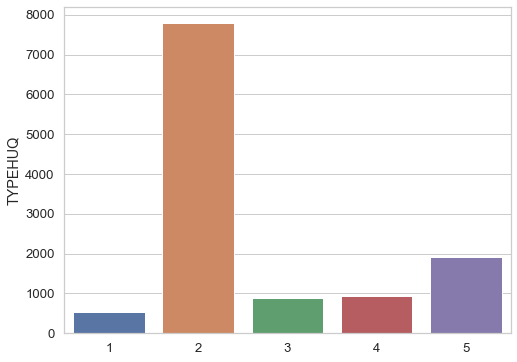

In [11]:
# visualizing TYPEHUQ (Type of housing unit)
fig, ax = plt.subplots(figsize=[8,6]) # set the figure size
sns.barplot(data['TYPEHUQ'].value_counts().index,y=data['TYPEHUQ'].value_counts())

- above graph indicated that there are 5 different categories of housing units types, out of all the five the 2nd category is the highest one

In [12]:
# Understanding KWH
print(f"Mean: {int(data['KWH'].mean())}, Std: {int(data['KWH'].std())}")

Mean: 11288, Std: 7641


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


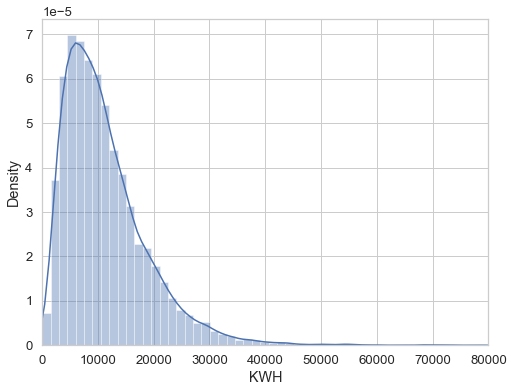

In [13]:
fig, ax = plt.subplots(figsize=[8,6])
ax.set_xlim(0,80000)
sns.distplot(data['KWH'],ax=ax, bins=100)
plt.savefig('KWH_dist.png',bbox_inches='tight')

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_KWH', ylabel='Density'>

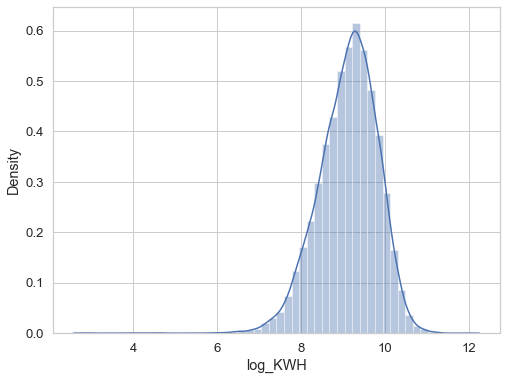

In [14]:
# as it is right skewed, we need to normalize it by applying log transformations
data['log_KWH'] = data['KWH'].map(np.log1p)
fig, ax = plt.subplots(figsize=[8,6])
sns.distplot(data['log_KWH'],ax=ax)

In [15]:
# as the above distribution describes that outliers are present in the data
#'Data > 3 Sigma
print(data.loc[data['log_KWH'] > (data['log_KWH'].mean()+3.*data['log_KWH'].std()), 'KWH'])

3551    150254
8112     77622
Name: KWH, dtype: int64


there are two outliers 150254 and 77622 kwh 

In [16]:
# removing the 150254 kwh  outlier with index 3551
data.drop(3551, inplace=True)


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


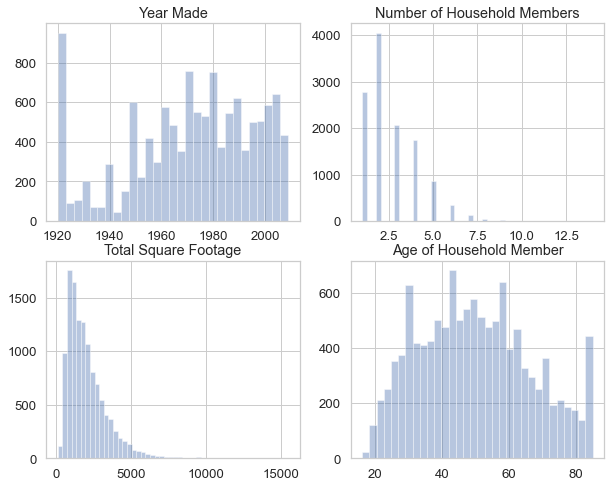

In [17]:
#understanding data 'YEARMADE','NHSLDMEM','TOTSQFT_EN','HHAGE'
fig, ax = plt.subplots(2,2,figsize=[10,8])
col = ['YEARMADE','NHSLDMEM','TOTSQFT_EN','HHAGE']
title = ['Year Made','Number of Household Members','Total Square Footage','Age of Household Member']
for i in range(4):
    ax.flatten()[i].set_title(title[i])
    sns.distplot(data[col[i]],ax=ax.flatten()[i],kde=False)
    ax.flatten()[i].set_xlabel('')

plt.savefig('features_dist.png',bbox_inches='tight')

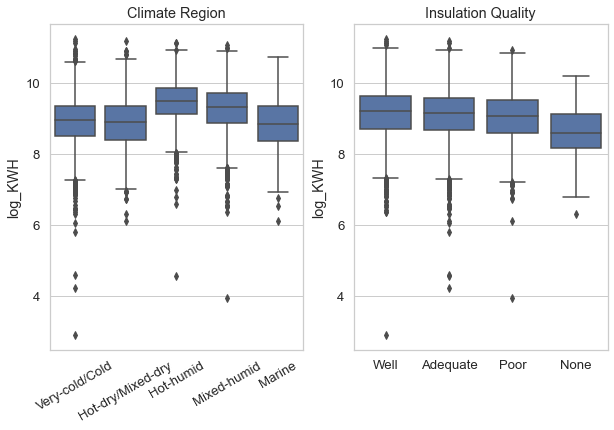

In [18]:
fig, ax = plt.subplots(1,2,figsize=[10,6])
ax[0].set_title('Climate Region')
ax[1].set_title('Insulation Quality')
b1 = sns.boxplot(ax=ax[0],data=data,x='Climate_Region_Pub',y='log_KWH',color=sns.color_palette()[0])
b2 = sns.boxplot(ax=ax[1],data=data,x='ADQINSUL',y='log_KWH',color=sns.color_palette()[0])
b1.set_xticklabels(['Very-cold/Cold','Hot-dry/Mixed-dry','Hot-humid','Mixed-humid','Marine'],rotation=30)
b2.set_xticklabels(['Well','Adequate','Poor','None'])
ax[0].set_xlabel(''); ax[1].set_xlabel('')

plt.savefig('climate_insul_box.png',bbox_inches='tight')

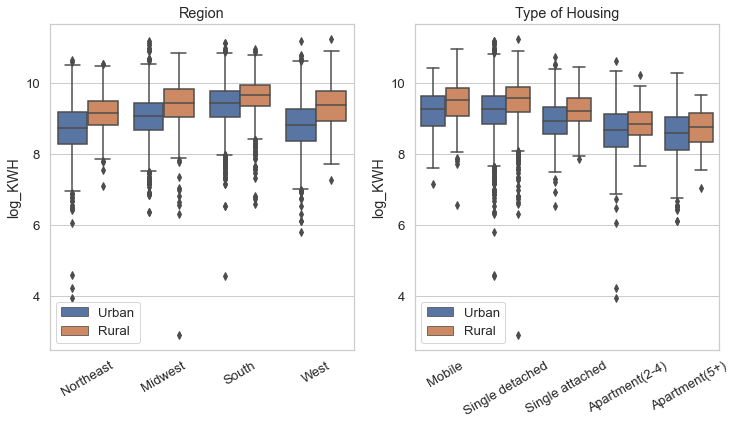

In [19]:
fig, ax = plt.subplots(1,2,figsize=[12,6])
ax[0].set_title('Region')
ax[1].set_title('Type of Housing')
b1 = sns.boxplot(ax=ax[0],data=data,x='REGIONC',y='log_KWH',hue='UR')
b2 = sns.boxplot(ax=ax[1],data=data,x='TYPEHUQ',y='log_KWH',hue='UR')
b1.set_xticklabels(['Northeast','Midwest','South','West'],rotation=30)
b2.set_xticklabels(['Mobile','Single detached','Single attached','Apartment(2-4)','Apartment(5+)'],rotation=30)
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles=handles,labels=['Urban','Rural'],loc=3)
ax[1].legend(handles=handles,labels=['Urban','Rural'],loc=3)
ax[0].set_xlabel(''); ax[1].set_xlabel('')

plt.savefig('region_type_box.png',bbox_inches='tight')

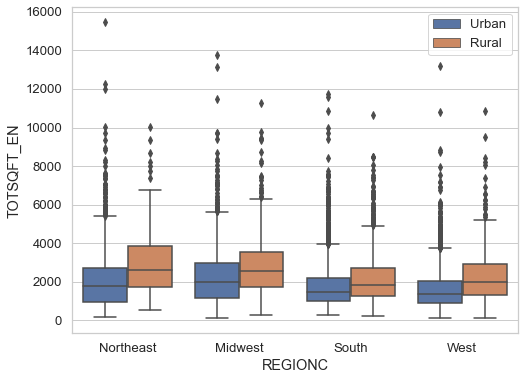

In [20]:
fig, ax = plt.subplots(figsize=[8,6])
b = sns.boxplot(ax=ax,data=data,x='REGIONC',y='TOTSQFT_EN',hue='UR')
b.set_xticklabels(['Northeast','Midwest','South','West'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=['Urban','Rural'])

plt.savefig('region_sqft_box.png',bbox_inches='tight')

[Text(0, 0, '<1950'),
 Text(1, 0, '1950s'),
 Text(2, 0, '1960s'),
 Text(3, 0, '1970s'),
 Text(4, 0, '1980s'),
 Text(5, 0, '1990s'),
 Text(6, 0, '2000-04'),
 Text(7, 0, '2004-09')]

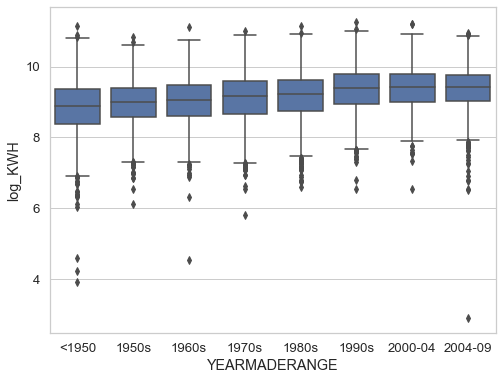

In [21]:
fig, ax = plt.subplots(figsize=[8,6])
b = sns.boxplot(ax=ax,data=data,x='YEARMADERANGE',y='log_KWH',color=sns.color_palette()[0])
b.set_xticklabels(['<1950','1950s','1960s','1970s','1980s','1990s','2000-04','2004-09'])

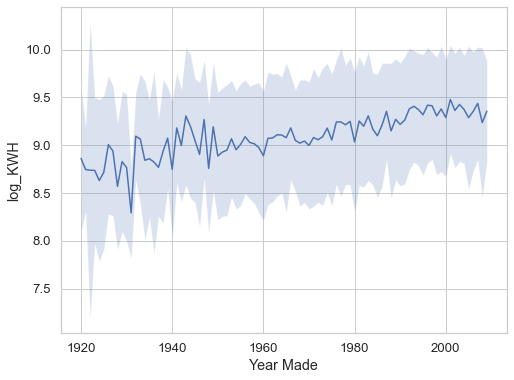

In [22]:
mean = data.groupby('YEARMADE')['log_KWH'].mean()
std = data.groupby('YEARMADE')['log_KWH'].std()
fig, ax = plt.subplots(figsize=[8,6])
ax.set(xlabel='Year Made',ylabel='log_KWH')
ax.plot(mean)
ax.fill_between(mean.index,mean-std,mean+std,alpha=0.2)

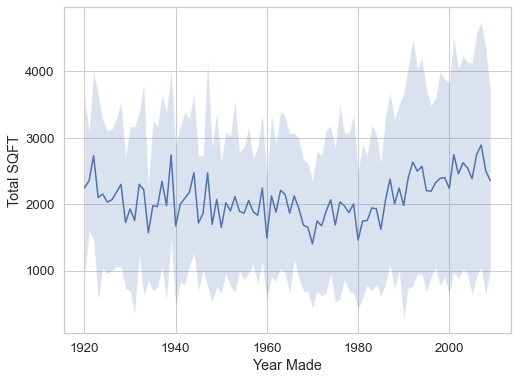

In [23]:
mean = data.groupby('YEARMADE')['TOTSQFT_EN'].mean()
std = data.groupby('YEARMADE')['TOTSQFT_EN'].std()
fig, ax = plt.subplots(figsize=[8,6])
ax.set(xlabel='Year Made',ylabel='Total SQFT')
ax.plot(mean)
ax.fill_between(mean.index,mean-std,mean+std,alpha=0.2)

In [28]:
#Since we have more than 10k samples, we are resampling them for visualization purposes. 
subdata = resample(data, replace=False, n_samples= 1000, random_state=42)

In [29]:
data.shape

(12082, 941)

/var/folders/l2/k6835zqd6430gf93n9qspq0h0000gn/T/ipykernel_1926/165342403.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=False)


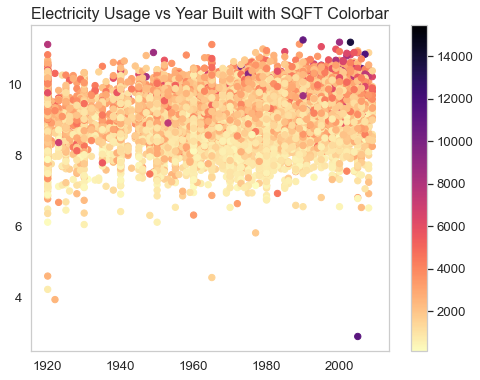

In [30]:
fig, ax = plt.subplots(figsize=[8,6])
ax.set_title('Electricity Usage vs Year Built with SQFT Colorbar',size=16)
ax.grid(b=False)
cax = ax.scatter(data['YEARMADE'],data['log_KWH'],c=data['TOTSQFT_EN'],cmap='magma_r',s=40)
cbar = fig.colorbar(cax)

plt.savefig('yearmade_sqft_kwh_scatter.png',bbox_inches='tight')

/var/folders/l2/k6835zqd6430gf93n9qspq0h0000gn/T/ipykernel_1926/1606819919.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=False)


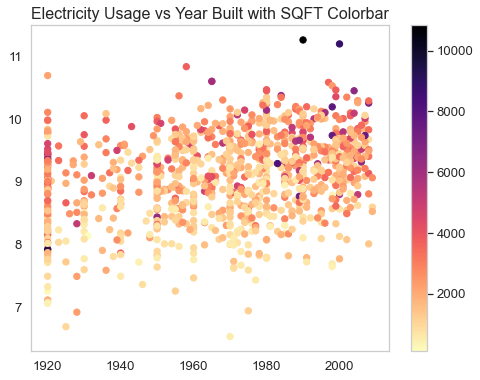

In [31]:
#using resampled 10k data, for better viz
fig, ax = plt.subplots(figsize=[8,6])
ax.set_title('Electricity Usage vs Year Built with SQFT Colorbar',size=16)
ax.grid(b=False)
cax = ax.scatter(subdata['YEARMADE'],subdata['log_KWH'],c=subdata['TOTSQFT_EN'],cmap='magma_r',s=40)
cbar = fig.colorbar(cax)

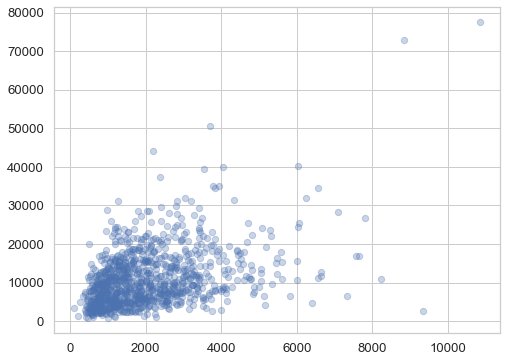

In [32]:
fig, ax = plt.subplots(figsize=[8,6])
ax.scatter(subdata['TOTSQFT_EN'],subdata['KWH'],s=40,alpha=0.3)

# Model Building

In [33]:
#function for calculating error
def rms_error(y_pred,y_true):
    se = (y_pred - y_true)**2
    mse = np.mean(se)
    return (se,math.sqrt(mse))
se_arr = {}
rmse = {}



In [34]:
from scipy.stats.stats import pearsonr

# Pearson correlation coefficient and the coresponding p-values
def calculate_rho(df,quant_col):
    for col in quant_col:
        corcoef = pearsonr(df[col],data['KWH'])
        print("%s: %8.2f P-value: %8.2f" % (col,corcoef[0],corcoef[1]))

/var/folders/l2/k6835zqd6430gf93n9qspq0h0000gn/T/ipykernel_1926/3511554446.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [35]:
#Deal with N/A entries for quantitative features and binary features
def convert_na(df, col):   
    arr = df[col].values
    arr[np.where(arr == -2)] = 0
    df.loc[:,col] = arr
    return df

In [36]:
#Check skewness
def check_skew(df, quant_col):
    #filter out columns with discrete values 
    quant_col = [col for col in quant_col if df[col].nunique()>100]
    #calculate skewness
    high_skew_col = [col for col in quant_col if abs(skew(df[col]) > 1)]
    return high_skew_col

#log transform skewed columns
def take_log(df, skewed_col):
    for col in skewed_col:
        df.loc[:,col] = df[col].map(np.log1p)
    return df

In [37]:
#Encoding Categorical data
def encode_qual(df,qual_col):
    return pd.get_dummies(df,columns=qual_col,prefix=qual_col,drop_first=True)

In [38]:
# prepare data for modeling all at once
def preprocess(df, qual_col,quant_col,bin_col):
    df = convert_na(df,quant_col+bin_col)
    skewed_col = check_skew(df,quant_col)
    df = take_log(df,skewed_col)
    df = encode_qual(df,qual_col)
    return df

# Regression model

In [39]:
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

In [40]:
quan_col = ['YEARMADE','NHSLDMEM','TOTSQFT_EN']
qual_col = ['Climate_Region_Pub','TYPEHUQ']

In [41]:
df = data[quan_col+qual_col]

In [42]:
#Convert categorical data
df = encode_qual(df,qual_col)

In [43]:
calculate_rho(df,quan_col)

YEARMADE:     0.22 P-value:     0.00
NHSLDMEM:     0.28 P-value:     0.00
TOTSQFT_EN:     0.38 P-value:     0.00


All the correlation coefficients are positive but not very large. All of the p-values are less than 0.01. They are all significant (using the confidence level of 0.05), which is to be expected considering the large number of samples we have.  

In [44]:
X = df.values
y = data['KWH'].values
X.shape, y.shape

((12082, 11), (12082,))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [46]:
print('Train set r^2:', clf.score(X_train,y_train))
print('Test set r^2:', clf.score(X_test,y_test))

Train set r^2: 0.3435923418014134
Test set r^2: 0.3392634937323935


In [47]:
f_value, p_value = f_regression(X,y.flatten())

In [48]:
for i in range(len(f_value)):
    print(df.columns[i],'F-value:',"%6.0f" % f_value[i],' P-value:',"%5.2f" % p_value[i])


YEARMADE F-value:    606  P-value:  0.00
NHSLDMEM F-value:   1011  P-value:  0.00
TOTSQFT_EN F-value:   1997  P-value:  0.00
Climate_Region_Pub_2 F-value:    181  P-value:  0.00
Climate_Region_Pub_3 F-value:    636  P-value:  0.00
Climate_Region_Pub_4 F-value:    204  P-value:  0.00
Climate_Region_Pub_5 F-value:     61  P-value:  0.00
TYPEHUQ_2 F-value:   1464  P-value:  0.00
TYPEHUQ_3 F-value:     84  P-value:  0.00
TYPEHUQ_4 F-value:    324  P-value:  0.00
TYPEHUQ_5 F-value:   1034  P-value:  0.00


In [49]:
se_arr['BM_SLR'], rmse['BM_SLR'] = rms_error(clf.predict(X_test),y_test)

In [50]:
rmse['BM_SLR']

6086.678797133354

In [51]:
# Using  feature selection to select the best features
from sklearn.feature_selection import SelectKBest


#Reading column list from a file into a dict

column_list = {}
with open('columns_list2.txt') as f:
    lines = [line.rstrip() for line in f]
lines = filter(None, lines)

for line in lines:
    col_name, list_txt = line.strip().replace(' ','').split('=')
    column_list[col_name] = list_txt.replace('[','').replace(']','').split(',')

In [52]:
#housing characteristics

qual_col = column_list['house_qual']
quant_col = column_list['house_quant']
bin_col = column_list['house_bin']

df = data[qual_col+quant_col+bin_col]
df = preprocess(df, qual_col,quant_col,bin_col)

/var/folders/l2/k6835zqd6430gf93n9qspq0h0000gn/T/ipykernel_1926/1044568183.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col] = arr
/var/folders/l2/k6835zqd6430gf93n9qspq0h0000gn/T/ipykernel_1926/3117734254.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col] = df[col].map(np.log1p)


In [53]:
# train test split
df_train, df_test, y_train, y_test = train_test_split(df, data['log_KWH'], test_size=0.2, random_state=42)
df_train.shape, df_test.shape

((9665, 366), (2417, 366))

In [54]:
def order_features(df_train,y_train, df_test):
    #Using SelectKBest to calculate f-value and p-value for each feature
    KBest = SelectKBest(f_regression,k=100)
    KBest.fit(df_train.values,y_train)
    
    #Create a Dataframe to store KBest result
    KBest_df = pd.DataFrame(index=df_train.columns)
    KBest_df['score'] = KBest.scores_
    KBest_df['p_value'] = KBest.pvalues_
    KBest_df = KBest_df.sort_values(by='score',ascending=False)
    
    print(KBest_df.head(10))
    
    #order the columns by f-score
    df_train = df_train[KBest_df.index]
    df_test = df_test[KBest_df.index]
    return df_train, df_test

def compare_nfeatures(df_train, y_train):
    #Compare models with k features
    k_list = range(10,240,10) 
    train_score = []
    test_score = []

    X_train = df_train.values
    for k in k_list:
        #Need to evaluate on a CV set, so wee need to split the training set again
        X_CV_train, X_CV_test, y_CV_train, y_CV_test = train_test_split(
                    X_train[:,:k], y_train, test_size=0.3, random_state=34)
        clf = LinearRegression()
        clf.fit(X_CV_train,y_CV_train)
        train_score.append(clf.score(X_CV_train,y_CV_train))
        test_score.append(clf.score(X_CV_test,y_CV_test))
    return pd.Series(train_score,index=k_list), pd.Series(test_score,index=k_list)

def plot_nfeatures(train_score, test_score):
    #plot the scores
    fig, ax = plt.subplots(figsize=[8,6])
    ax.set_xlabel('Number of Features',size=16)
    ax.set_ylabel('$r^2$ Score',size=16)
    ax.xaxis.grid(b=False)
    ax.plot(train_score.index,train_score,'b--',label='Train Score')
    ax.plot(test_score.index, test_score,'r-',label='Test Score')
    ax.legend(loc=4,fontsize=14)
    
def select_features(df_train,df_test,test_score):
    for i in range(len(test_score)-5):
        if np.abs(test_score.iloc[i+5]-test_score.iloc[i]) < 0.005*test_score.iloc[i]:
            break
    k_best = test_score.index[i]
    print('k_best:', k_best
    )
    #select the top k_best features
    df_train = df_train.iloc[:,:k_best]
    df_test = df_test.iloc[:,:k_best]
    return df_train, df_test

In [55]:
df_train, df_test = order_features(df_train, y_train, df_test)

                  score        p_value
BEDROOMS    2580.520253   0.000000e+00
TOTROOMS    2526.759063   0.000000e+00
TOTSQFT     2269.731544   0.000000e+00
TOTSQFT_EN  2188.284609   0.000000e+00
NCOMBATH    1972.620985   0.000000e+00
TOTCSQFT    1761.506946   0.000000e+00
PELAC_1     1672.816602   0.000000e+00
TYPEHUQ_2   1624.091602   0.000000e+00
NAPTFLRS    1611.128146   0.000000e+00
REGIONC_3   1403.910461  5.157075e-287


In [56]:
train_score, test_score = compare_nfeatures(df_train, y_train)

/var/folders/l2/k6835zqd6430gf93n9qspq0h0000gn/T/ipykernel_1926/2013560405.py:41: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.xaxis.grid(b=False)


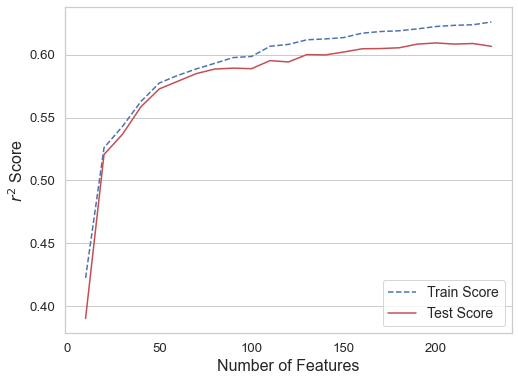

In [57]:
plot_nfeatures(train_score,test_score)

In [58]:
df_train, df_test = select_features(df_train,df_test,test_score)

k_best: 180


In [59]:
# Using random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [61]:
#GridSearchCV 
n_features = X_train.shape[1]
params = {'max_features': np.linspace(math.sqrt(n_features),n_features,num=10,dtype='int'),
         'min_samples_leaf': range(1,20,5),
         'max_depth':range(2,7)}
clf = RandomForestRegressor(n_estimators=15)
CV = GridSearchCV(clf, param_grid=params)
CV.fit(X_train,y_train)
CV.best_params_

{'max_depth': 6, 'max_features': 9, 'min_samples_leaf': 16}

In [62]:
clf = RandomForestRegressor(max_features=CV.best_params_['max_features'],
                           min_samples_leaf=CV.best_params_['min_samples_leaf'])
clf.fit(X_train,y_train)

RandomForestRegressor(max_features=9, min_samples_leaf=16)

In [63]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.5058657141416099
0.40965568586157497


In [64]:
arr, error = rms_error(clf.predict(X_test),y_test)
error

0.5338129502362188

In [85]:
# using GradientBoostingRegressor and kfold cross validation
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


param_grid = dict(n_estimators=np.array([50,100,200,300,400, 500]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=kfold)
grid_result = grid.fit(X_train,y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


0.415091 (0.035405) with: {'n_estimators': 50}
0.421159 (0.036444) with: {'n_estimators': 100}
0.421593 (0.037154) with: {'n_estimators': 200}
0.418720 (0.037864) with: {'n_estimators': 300}
0.415198 (0.038140) with: {'n_estimators': 400}
0.411793 (0.038470) with: {'n_estimators': 500}
Best: 0.421593 using {'n_estimators': 200}


In [86]:
model = GradientBoostingRegressor(random_state=21, n_estimators=200)
model.fit(X_train, y_train)



GradientBoostingRegressor(n_estimators=200, random_state=21)

In [87]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
print (mean_squared_error(y_test, predictions))

0.27827786209387856


In [88]:
arr, error = rms_error(model.predict(X_test),y_test)
error

0.5275204849992828